In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import traceback
import matplotlib.gridspec as gridspec
from matplotlib import rcParams
import matplotlib.ticker as ticker
import datetime
from scipy.fftpack import fft
from math import pi
from sklearn.utils import shuffle
import itertools



In [41]:
def finder(T,dol_ho, dol_co):
    mol = [28.97/1000, 44.01/1000, 18.01/1000]
    Cp = [1.0036, 0.838, 1.863]
    Cv = [0.7166, 0.629, 1.403]
    R = 8.31
    dol_air = 1-dol_co-dol_ho
    xi = [dol_air, dol_co, dol_ho]
    cp = 0
    cv = 0
    mol_all = 0
    for i in range(2):
        cp = cp + Cp[i]*mol[i]*xi[i]
        cv = cv + Cv[i]*mol[i]*xi[i]
        mol_all = mol_all + xi[i]*mol[i]
    
    gam = cp/cv
    a = np.sqrt(gam*R*T/mol_all)
    return (a)


('Коэфициент линейной зависимости концентрации углекислого газа от скорости звука:', -1.0161240187436928, '\n', 'Свободный член:', 348.6941844315355)


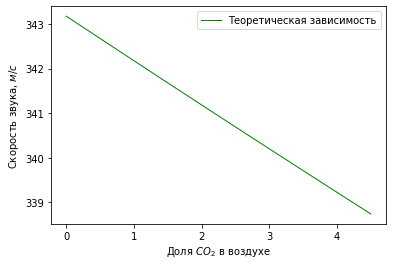

In [42]:
dol_co = [i/2 for i in list(range(0,10))] 
a_mass = []
for dol in dol_co:
    a_mass.append(finder(293.15, 0, dol/100))
    
    
    
a, b = np.polyfit(a_mass, dol_co, 1)
st_ln_ = 'Коэфициент линейной зависимости концентрации углекислого газа от скорости звука:', a, '\n', 'Свободный член:', b
st_ln = str(st_ln_)
print(st_ln)

fig = plt.figure()
sun_plt = fig.add_subplot(1,1,1)

sun_plt.set_xlabel(r'Доля $CO_{2}$ в воздухе')
sun_plt.set_ylabel(r'Скорость звука, $м/с$ ')

line=sun_plt.plot(dol_co, a_mass, linewidth = 1, label = 'Теоретическая зависимость', color='green')
sun_plt.legend()

my_file = open("C:/Users/gorar/Desktop/mipt/ing_lab.txt", "w+", encoding='utf-8')
my_file.write(st_ln)
my_file.close()